# CS 109A/AC 209A/STAT 121A Data Science: Homework 0 (Solutions)
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**

Import libraries

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D
from bs4 import BeautifulSoup
import urllib
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Problem 1: Processing Tabular Data from File

In this problem, we practice reading csv formatted data and doing some very simple data exploration.

### Part (a): Reading CSV Data with Numpy

Open the file `dataset_HW0.txt`, containing birth biometrics as well as maternal data for a number of U.S. births, and inspect the csv formatting of the data. Load the data, without the column headers, into an numpy array. 

Do some preliminary explorations of the data by printing out the dimensions as well as the first three rows of the array. Finally, for each column, print out the range of the values. 

**Prettify your output**, add in some text and formatting to make sure your outputs are readable (e.g. "36x4" is less readable than "array dimensions: 36x4").

**Solution:**

Opening the `.txt` file and visually inspecting the contents, we can see that the csv file contains column labels (strings) as well as table entries (floats). Now, .loadtxt() assumes, by default, that the data is floating point typed (see documentation for `numpy.loadtext()`). Thus, we need to first remove the column labels in the 0th row. Again, reading the doc for `numpy.loadtext()`, we see that the function has a parameter called "skiprows" which will cause the loadtext function to ignore $n$ number of initial rows.

Secondly, since the floating point values in the csv file are separated commas, we need to set the parameter called "delimiter" in the loadtext function to ",".

In [4]:
#We can see that the csv file contains column labels (strings)
#as well as table entries (floats)
data = np.loadtxt('dataset_HW0.txt', delimiter=',', skiprows=1)

print 'data dimensions:', data.shape
print data[:3, :]

print 'birth weight range:', data[:, 0].min(), '-', data[:, 0].max()
print 'femur length range:', data[:, 1].min(), '-', data[:, 1].max()
print 'maternal age range:', data[:, 2].min(), '-', data[:, 2].max()

data dimensions: (400, 3)
[[  2.9694893    1.97915605  16.        ]
 [  4.03896294   3.5556812   16.        ]
 [  5.30264328   3.3856329   15.        ]]
birth weight range: 2.96742562601 - 9.02194194628
femur length range: 0.479154166011 - 6.64873007157
maternal age range: 15.0 - 49.0


### Part (b): Simple Data Statistics

Compute the mean birth weight and mean femur length for the entire dataset. Now, we want to split the birth data into three groups based on the mother's age:

1. Group I: ages 0-17
2. Group II: ages 18-34
3. Group III: ages 35-50

For each maternal age group, compute the mean birth weight and mean femure length. 

<b>Prettify your output.</b>

Compare the group means with each other and with the overall mean, what can you conclude?

**Solution:**

**Coding tip:** If you need to feed a long list of variables, whose values need to be formatted in some particular way, to the print function, it might be easier to use a [Python string formatter](https://pyformat.info).

*For example:* say `x=2`, if you want to print the value of
~~~~
The value of the variable is: 2
~~~~
you can do it with the statement
```python
print 'The value of the variable is:', x
```
or you can first make a single string combing the string and the variable in the format you want
```python
'The value of the variable is: {}'.format(x)}
```
and then printing this formatted string
```python
print 'The value of the variable is: {}'.format(x)
```

The `{}` indicates where you wish to place the value of the variable within the string.

Finally, you can control the precision with which you display floating points with the `round()` function.

In [8]:
group1 = data[data[:, 2] < 18]
group2 = data[(data[:, 2] < 35) & (data[:, 2] > 17)]
group3 = data[data[:, 2] > 34]

print 'Sizes of groups I, II and III: {}, {}, {}'.format(group1.shape[0], 
                                                         group2.shape[0], 
                                                         group3.shape[0])

print 'Mean birth weights of groups I, II and III: {}, {}, {}'.format(round(group1[:, 0].mean(), 2), 
                                                                      round(group2[:, 0].mean(), 2), 
                                                                      round(group3[:, 0].mean(), 2))

print 'Mean femure lengths of groups I, II and III: {}, {}, {}'.format(group1[:, 1].mean(), 
                                                                       group2[:, 1].mean(), 
                                                                       group3[:, 1].mean())


Sizes of groups I, II and III: 100, 200, 100
Mean birth weights of groups I, II and III: 5.17, 6.71, 5.84
Mean femure lengths of groups I, II and III: 3.50680640853, 4.0043330551, 3.79489080744


The mean birth weights as well as the mean femur lengths of age group II is the highest of the three age groups; group III's mean birth biometrics is higher than those of group I.

### Part (c): Simple Data Visualization

Visualize the data using a 3-D scatter plot (label the axes and title your plot). How does your visual analysis compare with the stats you've computed in Part (b)?

**Solution:**

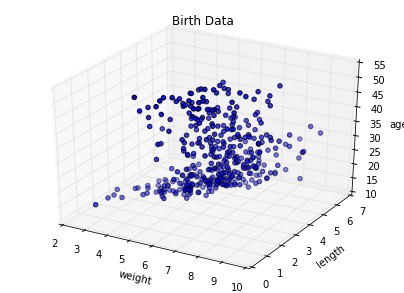

In [9]:
fig = plt.figure(figsize=(7, 5))

#a 1x1 grid of subplots is just one plot!
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
    
ax.set_xlabel('weight')
ax.set_ylabel('length')
ax.set_zlabel('age')
plt.title('Birth Data')
plt.show()

One can see that there is some variation in weight and length corresponding to age, but it's hard to see the patterns clearly.

### Part (d): Simple Data Visualization (Continued)

Visualize two data attributes at a time,

1. maternal age against birth weight
2. maternal age against femur length
3. birth weight against femur length

using 2-D scatter plots.

Compare your visual analysis with your analysis from Part (b) and (c).

**Solution:**

**Coding tip:** if you want to control the size of the figure you're generating, the `figure()` function has a parameter called "figsize" which allows you to do just that.

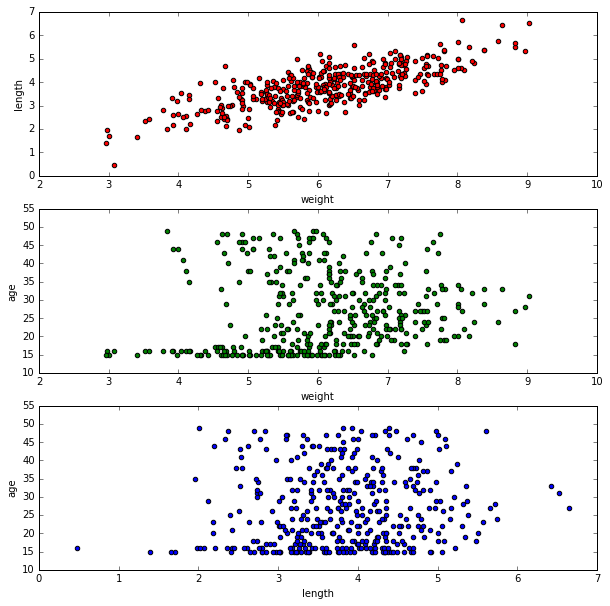

In [37]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(311)
ax.scatter(data[:, 0], data[:, 1], c='red')
ax.set_xlabel('weight')
ax.set_ylabel('length')

ax = fig.add_subplot(312)
ax.scatter(data[:, 0], data[:, 2], c='green')
ax.set_xlabel('weight')
ax.set_ylabel('age')

ax = fig.add_subplot(313)
ax.scatter(data[:, 1], data[:, 2], c='blue')
ax.set_xlabel('length')
ax.set_ylabel('age')

plt.show()

We can see, from the first scatter plot, that weight and femur length are positively correlated. From the second and third scatter plots we see that the points belonging to Group II are shifted, noticeably, to the right of the other two groups. This indicates that Group II's mean weight and length is greater than those of the other groups, which is what we find in Part (b).

### Part (e): More Data Visualization

Finally, we want to visualize the data by maternal age group. Plot the data again using a 3-D scatter plot, this time, color the points in the plot according to the age group of the mother (e.g. use red, blue, green to represent group I, II and III respectively).

**Solution:**

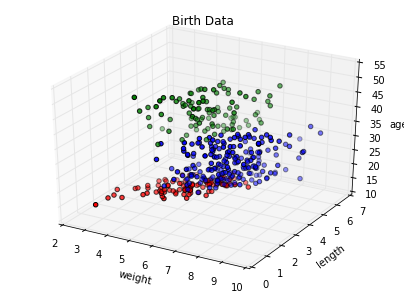

In [38]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(group1[:, 0], group1[:, 1], group1[:, 2], c='red')
ax.scatter(group2[:, 0], group2[:, 1], group2[:, 2], c='blue')
ax.scatter(group3[:, 0], group3[:, 1], group3[:, 2], c='green')
    
ax.set_xlabel('weight')
ax.set_ylabel('length')
ax.set_zlabel('age')
plt.title('Birth Data')
plt.show()

Color coding the points by age group helps to highlight the variations in weight and length with respect to age (rotating the 3D plot makes this clear). 

## Problem 2: Processing Web Data

In this problem we practice some basic web-scrapping using Beautiful Soup.

### Part (a): Opening and Reading Webpages

Open and load the page (Kafka's The Metamorphosis) at 
~~~~
http://www.gutenberg.org/files/5200/5200-h/5200-h.htm
~~~~
into a BeautifulSoup object. 

The object we obtain is a parse tree (a data structure representing all tags and relationship between tags) of the html file. To concretely visualize this object, print out the first 1000 characters of a representation of the parse tree using the `prettify()` function.

**Solution:**

In [3]:
#read page
page = urllib.urlopen('http://www.gutenberg.org/files/5200/5200-h/5200-h.htm').read()
#soupify: parse the html and generate a nested data structure in which the child tags 
#of a tag are stored as sub-objects of the object representing their parent tag.
soup = BeautifulSoup(page, "lxml")

#turns the nested data structure (parse tree) into a single string formatted to visually
#indicate which tags belong to which other tags.
print soup.prettify()[:1000]

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
 <head>
  <title>
   Metamorphosis by Franz Kafka
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body>
  <pre>

The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK ME


### Part (b): Exploring the Parsed HTML

Explore the nested data structure you obtain in Part (a) by printing out the following:

1. the content of the head tag
2. the string inside the head tag
3. each child of the head tag
2. the string inside the title tag
3. the string inside the preformatted text (pre) tag
4. the string inside the first paragraph (p) tag

Make your output readable.

**Solution:**

In [4]:
print 'head content:\n', soup.head.contents, '\n***********'
print 'head string:\n', soup.head.string, '\n***********'

print 'children of head:'
for child in soup.head.children:
    print child
print '\n***********'  

print 'title string:\n', soup.title.string, '\n***********'
print 'pre string:\n', soup.pre.string, '\n***********'
print 'p string:\n', soup.p.string, '\n***********'

head content:
[u'\n', <title>Metamorphosis by Franz Kafka</title>, u'\n', <meta content="text/html; charset=unicode-escape" http-equiv="Content-Type"/>, u'\n'] 
***********
head string:
None 
***********
children of head:


<title>Metamorphosis by Franz Kafka</title>


<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>



***********
title string:
Metamorphosis by Franz Kafka 
***********
pre string:


The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [

### Part (c): Extracting Text

Now we want to extract the text of The Metamorphosis and do some simple analysis. Beautiful Soup provides a way to extract all text from a webpage via the `get_text()` function. 

Print the first and last 1000 characters of the text returned by `get_text()`. Is this the content of the novela? Where is the content of The Metamorphosis stored in the BeautifulSoup object?

**Solution:**

Unfortunately, `get_text()` returns the Gutenberg project copy right information as well as the text of The Metamorphosis. The actual text of the novela is sandwiched between the paragraph (p) tags.

In [14]:
print soup.get_text()[:1000]
print '\n\n**********\n\n'
print soup.get_text()[-1000:-1]



Metamorphosis by Franz Kafka





The Project Gutenberg EBook of Metamorphosis, by Franz Kafka
Translated by David Wyllie.

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net

** This is a COPYRIGHTED Project Gutenberg eBook, Details Below **
**     Please follow the copyright guidelines in this file.     **


Title: Metamorphosis

Author: Franz Kafka

Translator: David Wyllie

Release Date: August 16, 2005 [EBook #5200]
First posted: May 13, 2002
Last updated: May 20, 2012

Language: English

Character set encoding: ISO-8859-1

*** START OF THIS PROJECT GUTENBERG EBOOK METAMORPHOSIS ***






Copyright (C) 2002 by David Wyllie.




  Metamorphosis
  Franz Kafka
Translated by David Wyllie
I
One morning, when Gregor Samsa woke from troubled dreams, he


**********


on 5.  General Informati

### Part (d): Extracting Text (Continued)

Using the `find_all()` function, extract the text of The Metamorphosis and concatenate the result into a single string. Print out the first 1000 characters of the string as a sanity check.

**Solution:**

In [5]:
#we'll build a list of all text inside of p tags
text = [] #start with empty list

#find all p tags (as a "list")
p_tags = soup.find_all('p')

#iterate through the "list" of p tags
for p in p_tags:
    #each time, add the text of the p tag to our list of text
    text.append(p.string)

#concatenate all the strings in our list, separated by a space
#the space is necessary! (Can you see why?)
text = ' '.join(text)

print text[:1000]

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.  He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.  The bedding was hardly able to cover it and seemed ready
to slide off any moment.  His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked. "What's happened to me?" he thought.  It wasn't a dream.  His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.  A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.  It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of he


### Part (e): Sentence and Word Count

Count the number of words in The Metamorphosis. Compute the average word length and plot a histogram of word lengths.

Count the number of sentences in The Metamorphosis. Compute the average sentence length and plot a histogram of sentence lengths.

You'll need to adjust the number of bins for each histogram.

**Hint**: You'll need to pre-process the text in order to obtain the correct word/sentence length and count. 

**Solution:**

There are many slick ways to solve this problem, for example, using Python's regular expression library, $\texttt{re}$ (in fact, using regular expressions will get you a much more accurate sense of sentence lengths). The solution we present here requires only the string methods presented in the Lab 0 cheatsheet.

number of words: 22010
average word length: 4


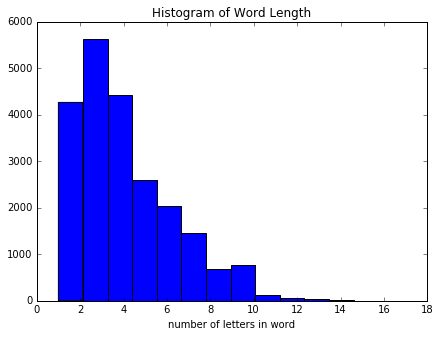

In [7]:
#Words are separated by spaces. 
#So we split the string by space and count the number of pieces in the split
#But we need to get rid of things like dashes, which lie between spaces!

word_count = text.replace('-', '')
print 'number of words:', len(word_count.split())

#To get accurate word counts we have to get rid of punctuation
def replace_punc(string):
    punctuation = ['"', ',', '.', '?', ';', ':', "'", '!', '(', ')']
    for p in punctuation:
        string = string.replace(p, '')
    return string

words = replace_punc(text).split()
word_len = [len(word) for word in words]
print 'average word length:', sum(word_len) / len(word_len)


fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.hist(word_len, bins=15)
ax.set_xlabel('number of letters in word')
ax.set_title('Histogram of Word Length')
plt.show()

average sentence length: 27


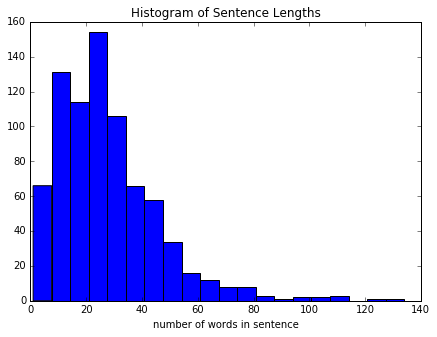

In [8]:
#Sentences are typically separated by periods, or questions marks, or exclaimation marks.

#We need to remove the period after abbreviated words like Mr., Mrs. etc! 

#It's hard to be sure that we've removed all the non-relevant periods, but in this story,
#the only abbreviated words are Mr. and Mrs.

#We should also remove question marks, exclaimation marks inside quotations that do not 
#terminate.

#Note: these tricks by no means guarantees that our final count is 100 percent correct!!!
text = text.replace('-', '')
text = text.replace('Mr.', 'Mr').replace('Mrs.', 'Mrs')
text = text.replace('!",', '",').replace('?",', '",')
text = text.replace('!', '.').replace('?', '.')

sentences = text.split('.')
sen_len = [len(s.split(' ')) for s in sentences]

print 'average sentence length:', sum(sen_len) / len(sen_len)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.hist(sen_len, bins=20)
ax.set_xlabel('number of words in sentence')
ax.set_title('Histogram of Sentence Lengths')
plt.show()

## Problem 3: Data from Simulations

In this problem we practice generating data by setting up a simulation of a simple phenomenon, a queue. 

Suppose we're interested in simulating a queue that forms in front of a small Bank of America branch with one teller, where the customers arrive one at a time.

We want to study the queue length and customer waiting time.

### Part (a): Simulating Arrival and Service Time

Assume that gaps between consecutive arrivals are uniformly distributed over the interval of 1 to 20 minutes (i.e. any two times between 1 minute and 20 minutes are equally likely). 

Assume that the service times are uniform over the interval of 5 to 15 minutes. 

Generate the arrival and service times for 100 customers, using the `uniform()` function from the `random` library.

**Solution:**

In [2]:
service_times = np.random.uniform(5, 15, size=100)

#we're simulating 100 arrival times. We treat the 0-th arrival time as the 
#gap between opening time and the arrival of the 0-th customer.
#alternatively, you can simulate arrival times for only 99 customers and 
#start the clock with the arrival of the 0-th customer
arrival_gaps = np.random.uniform(1, 20, size=100)

#arrival time for a new customer is the arrival time of the 
#previous customer plus the new customer's arrival gap
#the previous customer's arrival time is that of the 
#previous previous customer plus the previous customer's arrival gap...
#unfolding this, we see that the arrival time of customer i
#is equal to the sum of the 0 to i entries in the 
#arrival_gaps list

#we will present two EQUIVALENT ways of doing this

#using a for loop
arrival_times = []

for i in range(100):
    arrival_times.append(arrival_gaps[:i + 1])
    
#using list comprehension
arrival_times = [sum(arrival_gaps[:i + 1]) for i in range(100)]

### Part (b): Simulating the Queue

Write function that computes the average queue length and the average customer wait time, given the arrival times and the service times.

**Solution:**

Here we just want to calculate on average, how long is the line when a new customer arrives and how long a customer has to wait before getting served.

In [21]:
#The wait time is leave_time of the previous customer minus the arrival_time of the next

#The leave_time of the customer is the arrival_time plus the wait_time plus the service_time

#The length of the queue at the arrival of a new customer is the number of previous customers
#whose leave time is greater than the new customer's arrival time

def simulation(arrival_times, service_times):
    queue_len = [0] #queue length at the arrival of each customer
    wait_times = [0] #wait times
    leave_times = [arrival_times[0] + service_times[0]] #leave times
    
    #iterate through the simulated data for 100 customers and calculate their
    #experienced queue lengths, wait times and leave times
    for n in range(1, len(arrival_times)):
        queue = len([time for time in leave_times if time > arrival_times[n]])
        wait = max(0, leave_times[n - 1] - arrival_times[n])
        leave = arrival_times[n] + wait + service_times[n]
        
        queue_len.append(queue)
        wait_times.append(wait)
        leave_times.append(leave)
    
    avg_len = sum(queue_len) / len(queue_len)
    avg_wait = sum(wait_times) / len(wait_times)
    
    return avg_len, avg_wait

### Part (c): Average Queue Length and Wait Time

Run your simulation 500 times and report the mean and std of the average wait time and queue length for 100 customers. What do these statistics mean?

Explain why is isn't sufficient to run our simulation **once** and report the average wait time/queue length we obtain.

**Solution:**

In [22]:
lengths = []
waits = []

#repeat the simulation for 100 customers 500 times
for n in range(500):
    arrival_gaps = np.random.uniform(1, 20, size=100)

    arrival_times = [sum(arrival_gaps[:i + 1]) for i in range(100)]

    service_times = np.random.uniform(5, 15, size=100)
    
    avg_len, avg_wait = simulation(arrival_times, service_times)

    lengths.append(avg_len)
    waits.append(avg_wait)
    
lengths = np.array(lengths)
waits = np.array(waits)

print 'mean queue length over simulation:', lengths.mean()
print 'std of mean queue length:', lengths.std()
print 'mean wait time:', waits.mean()
print 'std of mean queue length over simulation:', waits.std()

mean queue length over simulation: 1.818
std of mean queue length: 1.40743596657
mean wait time: 18.9453993034
std of mean queue length over simulation: 13.8649267225


## Problem 4 (Challenge Problem): More Web Scrapping
*Challenge Problems are required for students taking the course for graduate credit and are extra credit for all others.*

In this problem we practice extracting tabular web data. Open and read the webpage at
~~~~
http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html
~~~~

Extract the Inflation History table and load it into a numpy array.

Generate a line graph representing the trend of consumer price index vs time (in months).

**Solution:**

Reading the table in question, we realize that the cpi values are lists with the newest values first [Thanks to our TF Abishek for catching it]! This means that if we are reading from the top down we will build a list of cpi values in reverse chronological order (find where we fix this in the code).

This, again, proves that simple common sense inspection of the data is vital! You must engage with the data in all meaningful ways.

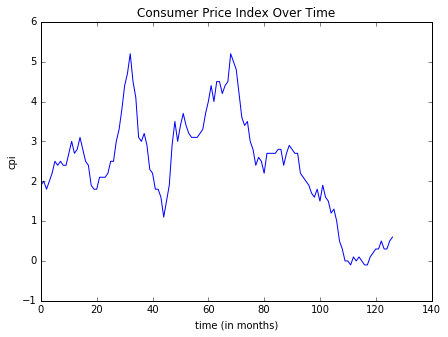

In [10]:
#Open page and parse html
page = urllib.urlopen('http://www.thisismoney.co.uk/money/news/article-2928285/Economy-tables-GDP-rates-inflation-history-unemployment.html').read()
soup = BeautifulSoup(page, "lxml")

#Find all tables
tables = soup.find_all('table')

#Initilize list of cpi's
data = []

#Find the table for inflation history
for table in tables:
    if table.caption is not None and table.caption.string == 'INFLATION HISTORY (MONTHLY CONSUMER PRICES INDEX - CPI)':
        #Find all rows in table (each row typically is a new cpi value)
        rows = table.tbody.find_all('tr')
        
        for row in rows:
            #For each row, we want the value in the second td tag
            entries = row.find_all('td')
            if entries[1].string is not None:
                cpi = entries[1].string
                #Find the index of the '%' character 
                index = cpi.index('%')
                #Store the characters prior to the '%' character (the numerals)
                data.append(float(cpi[:index]))
                
data = data[::-1] #reverse the list of cpi values               
data = np.array(data) #y-values
x = np.arange(len(data)) #x-values

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.plot(x, data) #plot x against y
ax.set_title('Consumer Price Index Over Time')
ax.set_xlabel('time (in months)')
ax.set_ylabel('cpi')
plt.show()
